In [28]:
import numpy as np 
import math as mh
from math import radians
import matplotlib.pyplot as plt

def rising1D(v0, g=9.8):
    h = v0**2 / (2*g)
    t = v0 / g
    return h, t

def falling1D(h, v0=0, g=9.8):
    time = (-v0 / g) + mh.sqrt((v0*2 / g*2) + (2 * h / g))
    velo = mh.sqrt(v0**2 + 2 * g * h)
    return time, velo

def projectile(v0, angle, h0, g=9.8, round=True):
    
    angle = np.radians(angle)
    
    v0x = v0 * np.cos(angle)
    v0y = v0 * np.sin(angle)
     
    h_rise, t1 = rising1D(v0y, g=9.8)
    t2, vfy = falling1D(h0+h_rise, v0=0, g=9.8)
    
    total_time = t1+t2
    times = np.linspace(0, total_time, 1000)
    
    x_motion = []
    y_motion = []
    
    for time in times:
        x_motion.append(v0x * time)
        y_motion.append(-1/2*g*time**2 + v0y * time + h0)
    
    max_range = max(x_motion)
    max_height = max(y_motion)
    
    final_velo = np.sqrt(vfy**2 + v0x**2)
    
    if round == True:
        max_height = round(max_height,2)
        max_range = round(max_range,2)
        total_time = round(total_time, 2)
        final_velo = round(final_velo, 2)
    
    return times, x_motion, y_motion, max_height, max_range, total_time, final_velo

def projgraph(v0, angle, h0, g=9.8, round=False):
    times, x_motion, y_motion, max_height, max_range, total_time, final_velo = projectile(v0, angle, h0, g=9.8, round=False)
    
    fig, ax = plt.subplots(figsize = (6,4))
    ax.plot(times, x_motion, 'r',  label = "x(t) motion")
    ax.set_title("Horiztonal Motion")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("X Position [m]")
    ax.legend()
    plt.tight_layout()
    
    fig, ax = plt.subplots(figsize = (6,4))
    ax.plot(times, y_motion, 'b', label = "y(t) motion")
    ax.set_title("Vertical Motion")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Y Position [m]")
    ax.legend()
    plt.tight_layout()

    
    fig, ax = plt.subplots(figsize = (6,4))
    ax.plot(x_motion, y_motion, 'k' , label = "parametric motion")
    ax.set_title("Projectile Motion")
    ax.set_xlabel("X Motion [m]")
    ax.set_ylabel("Y Position [m]")
    ax.legend()
    plt.tight_layout()

    return None

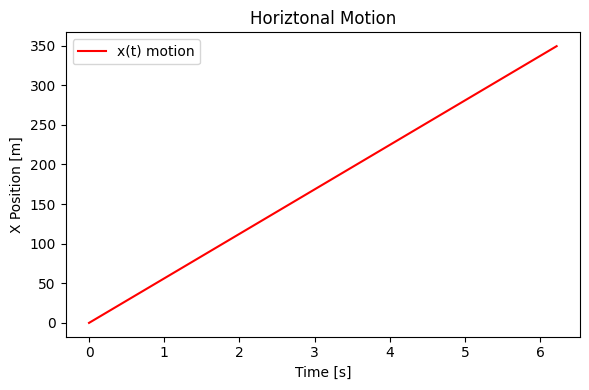

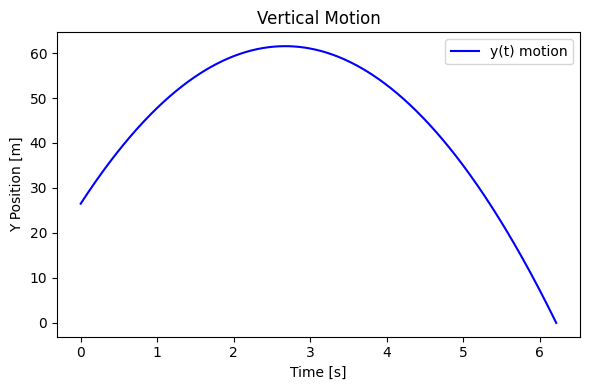

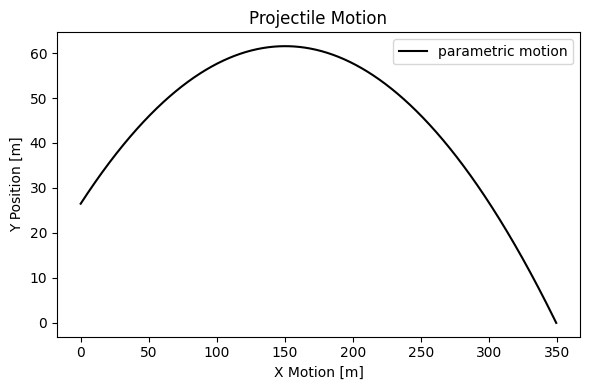

In [29]:
projgraph(v0=62, angle=25.0, h0=26.5, g=9.8, round=False)
